# Week 5 - Bivariate Analysis

## Please run the cells of the notebook as you get to them while reading

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns

# 1. Lesson: Bivariate graphs

In this lesson, we'll consider some bivariate plots: scatter plots, line plots, waterfall plots, area plots, and pair plots.  We'll also look at bivariate statistics such as correlations, ratios, and percentages.  First, let's create some data.

In [2]:
np.random.seed(0)
numpoints = 100
lesson_series_uniform = np.round(np.random.random(size = numpoints) * 100, 2)
lesson_series_base = np.round(np.random.random(size = numpoints)**2 * 100, 2)
lesson_series_skewed = lesson_series_base + np.random.normal(scale = 10, size = numpoints)
lesson_series_reverse = 100 - lesson_series_base + np.random.normal(scale = 10, size = numpoints)

This scatter plot puts one series against another.  The two series are anticorrelated - one goes up when the other goes down.

<Axes: >

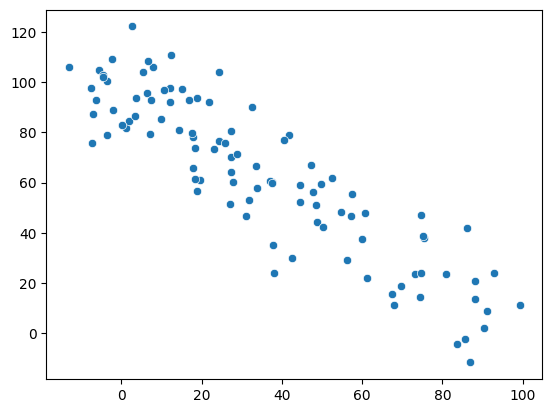

In [3]:
sns.scatterplot(x = lesson_series_skewed, y = lesson_series_reverse)

This pair plot compares three series against one another.  The diagonal shows the histogram of each series, while the non-diagonal entries plot two different series against each other.  The result in column 1, row 2 is a scatter plot that compares series #1 with series #2.  In effect, when the logic of the pair plot tells us to plot a series against itself (column 1, row 1), we draw a histogram.  (It would be silly to draw a scatter plot of a series against itself).  Because series #1 is not based on the "base" series, it is not correlated with series #2 or series #3, so the four scatter plots that compare series #1 to #2 and #3 look patternless.  The two scatter plots that compare series #2 with series #3 do appear to be correlated due to the "base" series that they share in common.

In [4]:
df = pd.DataFrame(np.array([lesson_series_uniform, lesson_series_skewed, lesson_series_reverse]).T, columns = ['uniform', 'skewed', 'reverse'])

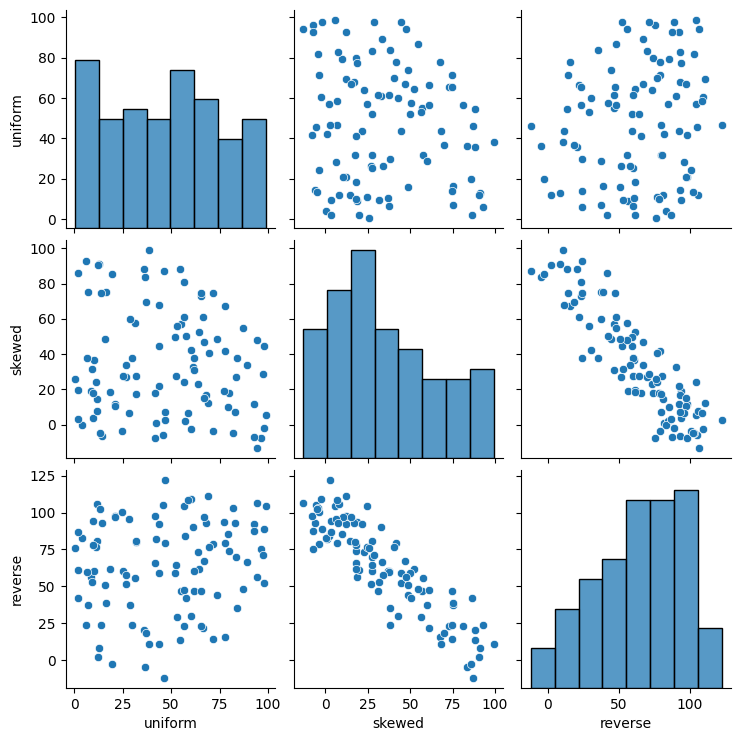

In [5]:
sns.pairplot(df)

We can compute the correlation coefficience between each pair.

In [6]:
print("Correlations:", df.corr())

Correlations:           uniform    skewed   reverse
uniform  1.000000 -0.145022  0.149771
skewed  -0.145022  1.000000 -0.894549
reverse  0.149771 -0.894549  1.000000


This shows that there is a strong negative correlation between the "skewed" and "reverse" datasets (a larger negative number in row 2, column 3 and in row 3, column 2) and almost no correlation between the "uniform" dataset and the others (the much smaller numbers at those locations in the table.)

Q: What is a correlation telling us?

If the correlation is large (close to 1) it tells us that the two variables are usually either both large or both small in value.  If we graphed them on a scatter plot, the shape would be close to a straight line, positioned diagonally from the lower left to upper right.

If the correlation is very negative (close to -1), it tells us that when one variable is large, the other is small.  If we graphed them on a scatter plot, the shape would be close to a straight line, positioned diagonally from the upper left to lower right.

If the correlation is zero, it tells us that the two variables, plotted on a scatter plot, would form a cloud.  The cloud can have different shape - for instance, it could be square or circular - but it cannot look like a diagonal line.  Knowing the value of one variable would tell you nothing about the value of the other variable.  (At least, it would not tell you whether the other variable is large or small).

The correlation coefficients above are called by the letter R.  R can be positive or negative, and lies between -1 and 1.  If we square R, we get a value called $R^2$ which is sometimes used to describe the correlation.  Unless R = 0 or 1, $R^2$ will be smaller in magnitude than R (and always positive), which means that it is very important to know if you are talking about R or $R^2$.  Since the values above can be negative, you can know for sure that they are R values, not $R^2$.

Q: How do you decide if a correlation is strong?

It depends on the application.  Some sources say that a correlation of R = 0.7 or 0.8 is strong, but in other applications (say, the social sciences) a correlation of 0.5 might be considered quite strong.  It is not unusual for social scientists to report correlations even as low a 0.2 as being important.

Q: What is the purpose of finding a correlation?

Here are a few:

1. Variables that are correlated with a target variable might be especially useful in predicting that variable.  This might also suggest that a linear model could work.  On the other hand, just because there are no pairwise correlations doesn't mean that a linear model won't work.  For example, if you select X, Y, and Z from this list of four possibilities: \[\[X = 1, Y = 0, Z = 0], \[X = 0, Y = 1, Z = 0], \[X = 0, Y = 0, Z = 1], \[X = 1, Y = 1, Z = 1]] then any two variables are completely uncorrelated, but the sum of the three is usually 1.  So the linear model Z = 1 - X - Y is accurate in three out of four cases even though all pairwise correlations are zero.

2. Variables that are very correlated with each other might be redundant.  In the extreme case, two variables that have a correlation of 1.0 are "linearly dependent" - they essentially provide the same information.  For example, if one column is a height in inches, and another is a height in centimeters, then they are redundant.  Moreover, if you use two highly correlated variables as predictors, the results will be somewhat unpredictable.  For example, if HI is the height in inches and HC is the height in centimeters, then the following formulas are all equivalent: HC, 2.54 * HI, 0.5 * HC + 1.27 * HI, 1001 * HC - 2540 * HI.  So there's no knowing which one you'll get if you try to build a model based on these variables.  The last one in particular is a little bit surprising, given the large coefficients, but it could very well be the result of a linear regression analysis.

3. Correlation can help you to detect problems with the data.  If two variables are correlated but shouldn't be, or if they're not correlated but should be, there might be something wrong with the data.  It's important to test the data to see if it makes sense.

4. Correlations can be interesting things to report.  If your client or organization is asking for a verbal explanation of the dataset, they might be interested in knowing about any correlations for reasons of their own.

A waterfall chart shows a value after a sequence of inputs and outputs.

In [7]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name='This title is not displayed',
    orientation='v',
    measure=['absolute','relative','relative','relative','relative'],
    x=["2023-Jan", "receipts-in", "interest-in", "expenses-out", "interest-out", "2024-Jan"],
    textposition='outside',
    text=['Total','after-receipts','after-interest','after-expenses','after-interest'],
    y=[123.45,42.08,21.97,-54.31,-50.23],
    connector=dict(line=dict(color='rgb(63, 63, 63)'))
))

fig.update_layout(
    title='Waterfall Plot',
    showlegend=False
)
fig.update_yaxes(range=[-1,230])
fig.show()

A line plot is typically associated with a time or date range.  It shows how a variable rises and falls over a period of time.

/tmp/ipykernel_7144/2082488306.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='None'>

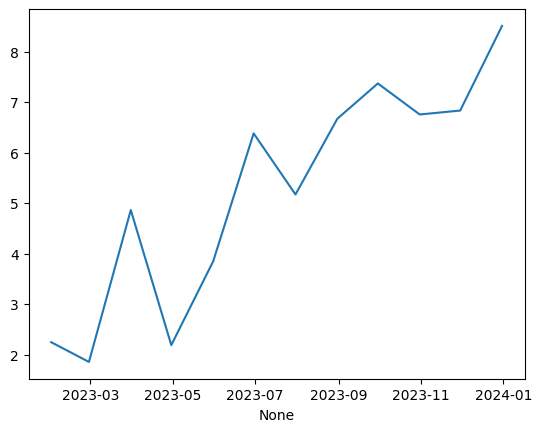

In [8]:
numdates = 12
time_series = np.random.random(size = numdates) * 5 + np.arange(numdates) / 3
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
sns.lineplot(x = datearray, y = time_series)

An area plot stacks one curve on top of another.  In the graph below, the top line shows the sum of the two series (ser1 + ser2) while the bottom line just shows ser1.

<Axes: >

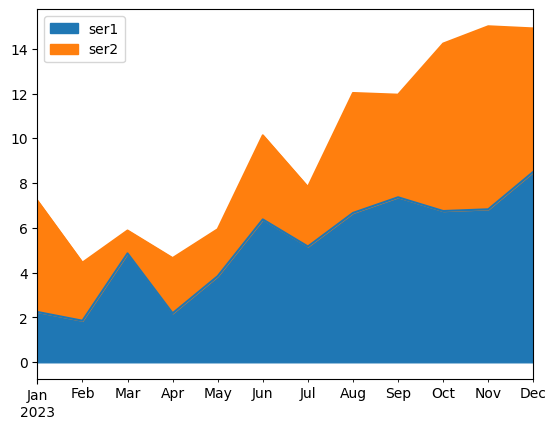

In [9]:
time_series_2 = np.random.random(size = numdates) * 5 + np.arange(numdates) / 3
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 2. Weekly graph question

Below is a pair plot showing the correlation between the levels of chemical A, B, and C in a water sample.  If you had to choose just _three_ of the nine graphs in the pair plot to display, which would you choose?  How would you alter the way these graphs are displayed to make them clearer or more informative?  Would you fit any of these graphs to a line or curve?  Why or why not?  What if you had to choose just _one_?  What if you had to choose _six_?

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(0)
num_data = 100
base_data = np.random.random(size = num_data)
chem1 = base_data + np.random.normal(size = num_data) * 0.1
chem2 = base_data**2 + np.random.normal(size = num_data) * 0.1
chem3 = 1 - base_data + np.random.normal(size = num_data) * 0.1
df_chem = pd.DataFrame({'chem1':chem1,'chem2':chem2,'chem3':chem3})

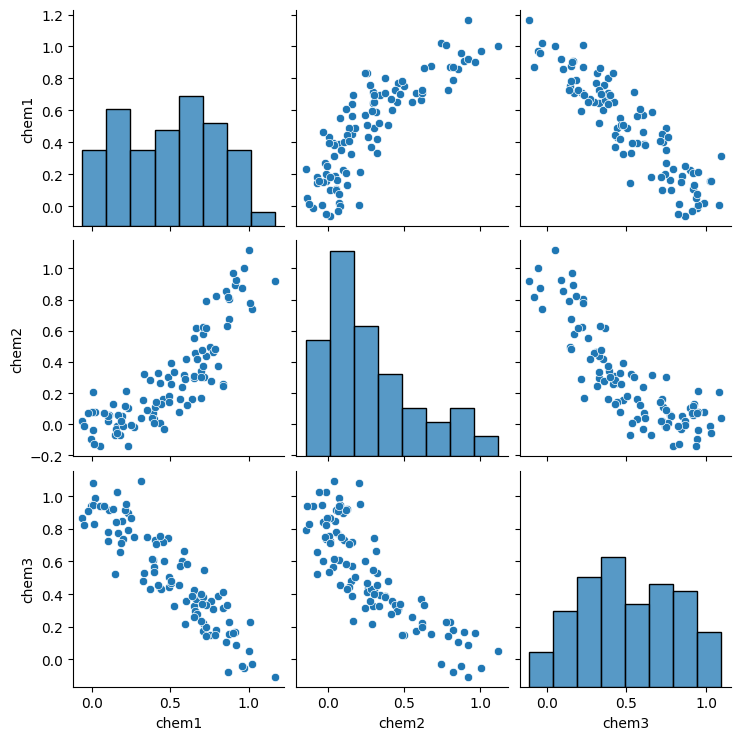

In [11]:
sns.pairplot(df_chem)

### Chosing 3 graphs

Histogram of chem1: To show its distribution.

Scatter plot of chem1 vs. chem2: To show their non-linear positive correlation.

Scatter plot of chem1 vs. chem3: To show their negative, somewhat linear correlation.

These three graph helps show different concepts. The distribution of one variable and two distinct bivariate relationships involving the same "primary" variable (chem1) but with different patterns.

### How Would I alter them?

To start I would edit the titles and labels: Add clear, descriptive titles to each graph (e.g., "Distribution of Chemical 1 Levels", "Chemical 2 vs. Chemical 1"). Label axes clearly (e.g., "Chem1 Level", "Chem2 Level"). Visually I would adjust for slightly transparent points if there's high overlap to better visualize density. As well as making the plots larger to improve readability of points and labels and increasing number of bins to help visualize distribution on the histograms. 

### Fit Lines/Curves
Histogram of chem1: No line/curve fitting needed. This is about distribution. A kernel density estimate (KDE) could be overlaid to show the smoothed probability density function, which is a curve.
Scatter plot of chem1 vs. chem2: Yes, fit a curve. The relationship is clearly non-linear. A polynomial regression (e.g., quadratic or cubic) would be appropriate given the observed curvature. This would help quantify and visualize the non-linear trend.
Scatter plot of chem1 vs. chem3: Yes, fit a line (linear regression). The relationship appears to be approximately linear with a negative slope. A linear fit would help to quantify the strength and direction of this relationship.

### Choosing 1? 6?
The most informative single graph would be one that shows a clear relationship between two chemicals. The scatter plot of chem1 vs. chem2 (or chem2 vs. chem1) stands out because it shows a strong, clear, and non-linear relationship, which is often more interesting and complex than a linear one. While chem1 vs chem3 is also good, the non-linearity of chem1 vs chem2 is more distinctive.

All three histograms: chem1, chem2, chem3. These show the individual distributions of each chemical.
Three unique scatter plots: To avoid redundancy, I would pick one "half" of the off-diagonal plots. For example, all the plots in the lower left triangle:

    chem2 vs. chem1

    chem3 vs. chem1

    chem3 vs. chem2


# 3. Homework - Reproducing Pair Plot Graphs

I'm going to show you some Pair Plot (Scatter and Histogram) graphs.  I'd like you to generate some data that will generate those graphs.

Example: this cloud involves a match between two normal distributions.

<Axes: xlabel='data1', ylabel='data2'>

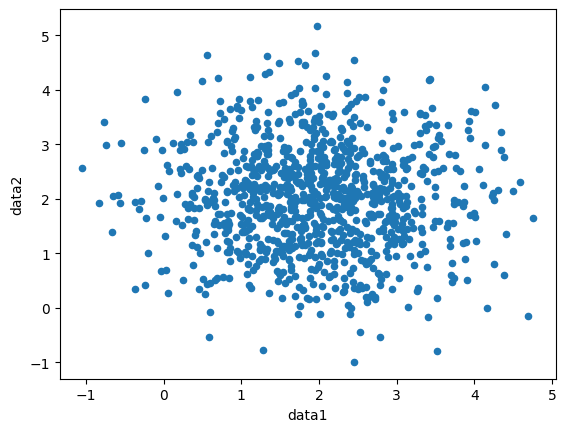

In [12]:
num_points = 1000
np.random.seed(0)
data1 = np.random.normal(size = num_points) + 2
data2 = np.random.normal(size = num_points) + 2
df_twonorm = pd.DataFrame({"data1":data1,"data2":data2})
df_twonorm.plot.scatter(x = "data1", y = "data2")

Problem: Can you design data that will generate the following scatter plot?  You may need to join multiple series to make one big series for the y-axis data.  That will allow you to create the two clouds. Use Google or ChatGPT to find the function that does that.  It is okay if the precise numbers are not re-created; just the general shape: two vertically separated clouds of points.

In [ ]:
!pip install IPython

In [ ]:
from IPython.display import Image
Image("twoclouds.png")

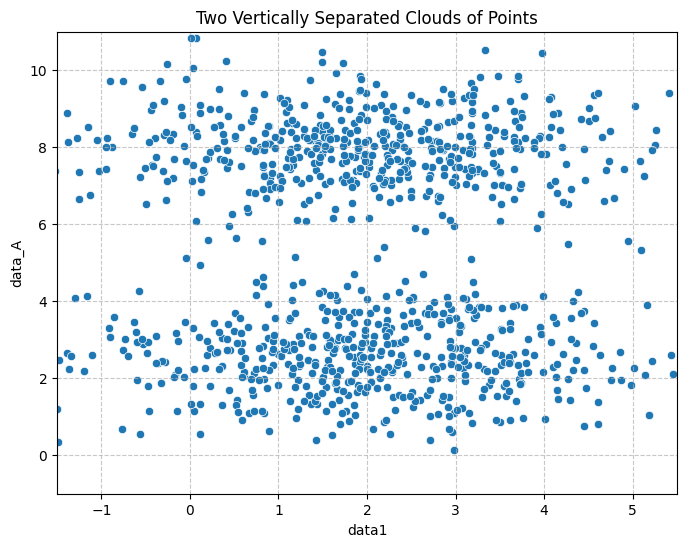

DataFrame head:
      data1    data_A
0  2.920024  3.568731
1  4.765550  2.266134
2  2.406636  2.398195
3  3.704671  2.350923
4 -0.607498  3.198096

DataFrame shape: (1000, 2)


In [20]:
# Parameters for the clouds 
import matplotlib.pyplot as plt

num_points_per_cloud = 500

# Parameters for the lower cloud
mean_x_lower = 2.0
std_x_lower = 1.5
mean_y_lower = 2.5
std_y_lower = 1.0

# Parameters for the upper cloud
mean_x_upper = 2.0
std_x_upper = 1.5
mean_y_upper = 8.0
std_y_upper = 1.0

# Generate data for the lower cloud
x_lower = np.random.normal(loc=mean_x_lower, scale=std_x_lower, size=num_points_per_cloud)
y_lower = np.random.normal(loc=mean_y_lower, scale=std_y_lower, size=num_points_per_cloud)

# Generate data for the upper cloud
x_upper = np.random.normal(loc=mean_x_upper, scale=std_x_upper, size=num_points_per_cloud)
y_upper = np.random.normal(loc=mean_y_upper, scale=std_y_upper, size=num_points_per_cloud)


# Combine the data from both clouds
combined_x = np.concatenate((x_lower, x_upper))
combined_y = np.concatenate((y_lower, y_upper))

df = pd.DataFrame({
    'data1': combined_x,
    'data_A': combined_y
})

plt.figure(figsize=(8, 6))
sns.scatterplot(x='data1', y='data_A', data=df)
plt.title('Two Vertically Separated Clouds of Points')
plt.xlabel('data1')
plt.ylabel('data_A')
plt.xlim(-1.5, 5.5)
plt.ylim(-1.0, 11.0)
plt.grid(True, linestyle='--', alpha=0.7) 
plt.show()
print("DataFrame head:")
print(df.head())
print("\nDataFrame shape:", df.shape)

Challenge problem!  Hint: you will need two series, and three segments of the first series will connect with the three segments of the second series.

In [ ]:
from IPython.display import Image
Image("threeclouds.png")

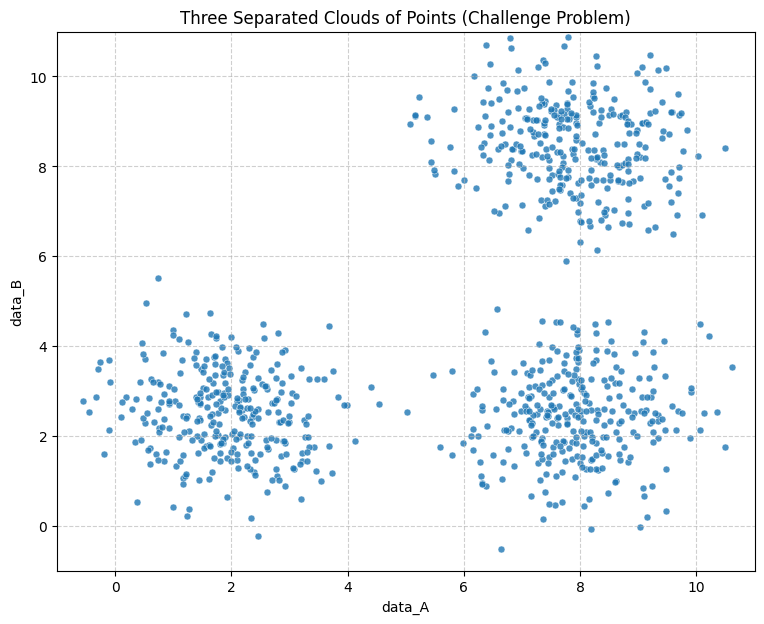

DataFrame head:
     data_A    data_B
0  2.132748  2.802373
1  2.593724  1.905055
2  2.112546  3.883430
3  0.356246  2.826089
4  3.534149  0.995474

DataFrame shape: (900, 2) (Total points: 900)


In [22]:
# Parameters for each of the three clouds
num_points_per_cloud = 300 

# Cloud 1: Bottom-Left
mean_x1, mean_y1 = 2.0, 2.5
std_x1, std_y1 = 1.0, 1.0 

# Cloud 2: Bottom-Right
mean_x2, mean_y2 = 8.0, 2.5
std_x2, std_y2 = 1.0, 1.0

# Cloud 3: Top-Right
mean_x3, mean_y3 = 8.0, 8.5
std_x3, std_y3 = 1.0, 1.0

# Generate data for each cloud

# Cloud 1 (Bottom-Left)
data_A_c1 = np.random.normal(loc=mean_x1, scale=std_x1, size=num_points_per_cloud)
data_B_c1 = np.random.normal(loc=mean_y1, scale=std_y1, size=num_points_per_cloud)

# Cloud 2 (Bottom-Right)
data_A_c2 = np.random.normal(loc=mean_x2, scale=std_x2, size=num_points_per_cloud)
data_B_c2 = np.random.normal(loc=mean_y2, scale=std_y2, size=num_points_per_cloud)

# Cloud 3 (Top-Right)
data_A_c3 = np.random.normal(loc=mean_x3, scale=std_x3, size=num_points_per_cloud)
data_B_c3 = np.random.normal(loc=mean_y3, scale=std_y3, size=num_points_per_cloud)

# Combine the data from all three clouds into two main series
combined_data_A = np.concatenate((data_A_c1, data_A_c2, data_A_c3))
combined_data_B = np.concatenate((data_B_c1, data_B_c2, data_B_c3))

df_three_clouds = pd.DataFrame({
    'data_A': combined_data_A,
    'data_B': combined_data_B
})

# Plot the data using Seaborn
plt.figure(figsize=(9, 7)) 
sns.scatterplot(x='data_A', y='data_B', data=df_three_clouds, s=25, alpha=0.8)
plt.title('Three Separated Clouds of Points (Challenge Problem)')
plt.xlabel('data_A')
plt.ylabel('data_B')
plt.xlim(-1.0, 11.0)
plt.ylim(-1.0, 11.0)
plt.grid(True, linestyle='--', alpha=0.6) # Add a subtle grid
plt.show()

print("DataFrame head:")
print(df_three_clouds.head())
print(f"\nDataFrame shape: {df_three_clouds.shape} (Total points: {num_points_per_cloud * 3})")


Would you expect to see a correlation for this challenge problem?  (Hint: does knowing the value of data_A tell you anything about the value of data_B - in particular, whether it is large or small?)  If you managed to reproduce the graph using data, test it yourself using the corr() function.

In [ ]:
# I would not expect to see any correlation for this challenge problem. 
# There are very clear relationships and patterns (i.e., distinct clusters), they are not linear, and the Pearson correlation coefficient would not capture them.

Here is a histogram.  Can you provide data that will approximately re-create this histogram?

It is okay if the precise numbers are not re-created; just the general shape: tailing off on either side, but tailing off to a nonzero number.  (In this case, about 300).

In [ ]:
from IPython.display import Image
Image("histogram.png")

Total data points generated: 18000


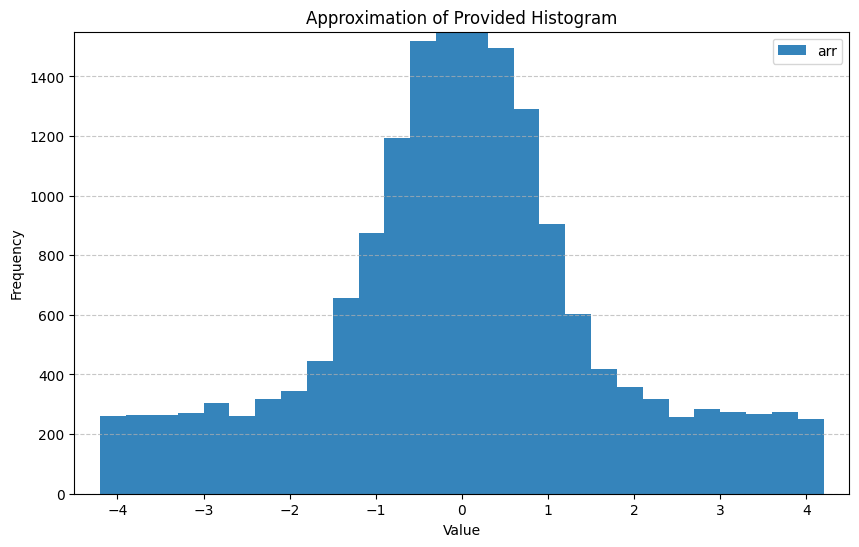


Sample of generated data:
0   -1.777066
1   -0.111373
2   -0.335320
3   -0.807194
4   -0.272309
dtype: float64


In [24]:
# Parameters for the central peak (Normal Distribution)
mean_normal = 0.0          # Center of the peak
std_dev_normal = 0.8       # Spread of the peak (smaller value = narrower peak)
num_points_normal = 10000  # Number of points contributing to the peak

# Parameters for the uniform base (Uniform Distribution)
min_uniform = -4.5         
max_uniform = 4.5          
num_points_uniform = 8000  

# Generate data from each distribution

# Generate points for the central peak
data_peak = np.random.normal(loc=mean_normal, scale=std_dev_normal, size=num_points_normal)

# Generate points for the uniform base
data_uniform = np.random.uniform(low=min_uniform, high=max_uniform, size=num_points_uniform)

# Combine the data into a single array

combined_data = np.concatenate((data_peak, data_uniform))

print(f"Total data points generated: {len(combined_data)}")

# Plot the histogram
plt.figure(figsize=(10, 6)) # Set the figure size for better visualization

bins = np.arange(-4.2, 4.2 + 0.3, 0.3)

plt.hist(combined_data, bins=bins, alpha=0.9, label='arr')

# Add labels and title for clarity
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Approximation of Provided Histogram')
plt.legend()
plt.xlim(-4.5, 4.5)
plt.ylim(0, 1550) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()

# Display a sample of the generated data (optional)
print("\nSample of generated data:")
print(pd.Series(combined_data).head())

Create a line plot that shows a sales volume of soft drinks that decreases, then increases over the course of a year, in a U-shaped curve, but with some noise.

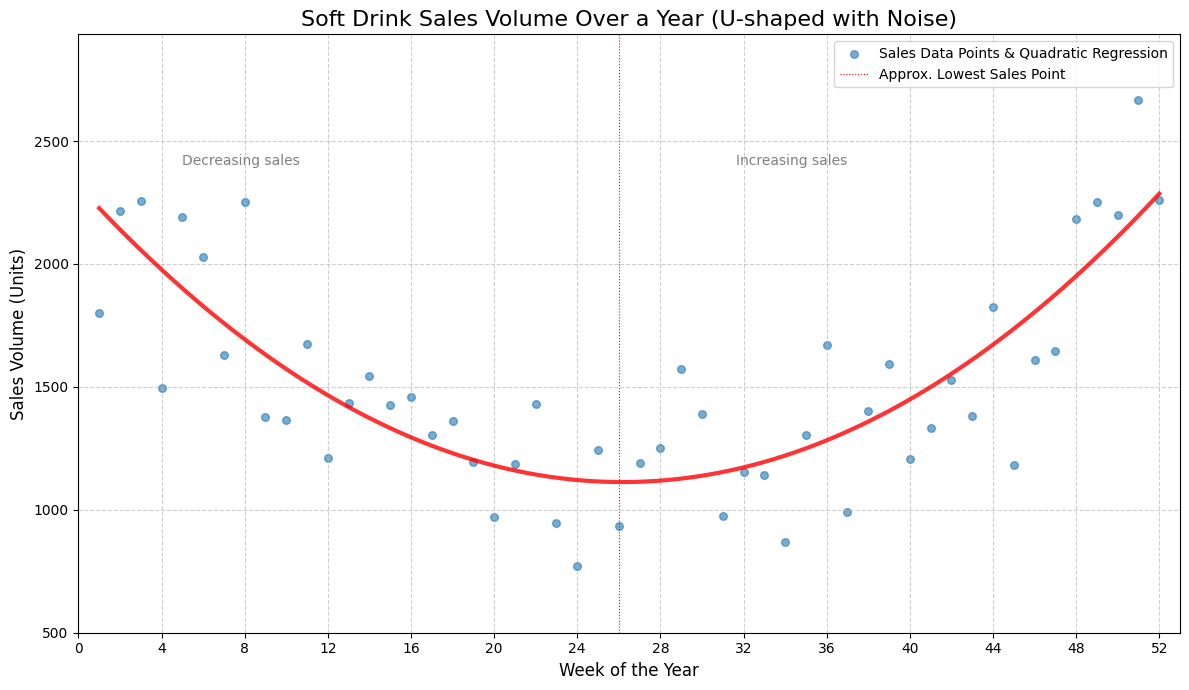

Generated Sales Data (first 10 rows):
   Week  Sales Volume
0     1   1798.602338
1     2   2214.038710
2     3   2256.468933
3     4   1497.444996
4     5   2189.642304
5     6   2026.852751
6     7   1630.844140
7     8   2253.120295
8     9   1375.482968
9    10   1363.770894

Generated Sales Data (last 10 rows):
    Week  Sales Volume
42    43   1380.741565
43    44   1826.087842
44    45   1180.271862
45    46   1608.123166
46    47   1645.757463
47    48   2182.350685
48    49   2251.797841
49    50   2199.463382
50    51   2667.339298
51    52   2260.170353


In [27]:
# Parameters for the sales data
num_weeks = 52 # Representing one year in weeks
weeks = np.arange(1, num_weeks + 1)

# Create the U-shaped base curve
center_week = num_weeks / 2.0 
min_sales_volume = 1000 
sales_increase_factor = 2 

base_sales = sales_increase_factor * (weeks - center_week)**2 + min_sales_volume

# Add random noise to the sales data
noise_amplitude = 250 # The magnitude of random noise to add
noise = np.random.normal(loc=0, scale=noise_amplitude, size=num_weeks)

# Combine the base sales with the noise
sales_volume = base_sales + noise

# Ensure sales volume doesn't go below zero (though unlikely with these parameters)
sales_volume[sales_volume < 0] = 0

# Create a Pandas DataFrame (optional, but good practice for data handling)
df_sales = pd.DataFrame({
    'Week': weeks,
    'Sales Volume': sales_volume
})

# Plot the data
plt.figure(figsize=(12, 7)) # Set a good size for the plot
sns.regplot(x='Week', y='Sales Volume', data=df_sales,
            order=2, # This is the key: specifies a 2nd order polynomial (quadratic)
            scatter_kws={'alpha':0.6, 's': 30, 'color': '#1f77b4'}, # Aesthetics for scatter points
            line_kws={'color': 'red', 'linewidth': 3, 'alpha': 0.8}, # Aesthetics for the regression line
            ci=None, # Set to None to hide the confidence interval around the regression line
            label='Sales Data Points & Quadratic Regression'
           )
plt.title('Soft Drink Sales Volume Over a Year (U-shaped with Noise)', fontsize=16)
plt.xlabel('Week of the Year', fontsize=12)
plt.ylabel('Sales Volume (Units)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(np.arange(0, num_weeks + 1, 4)) # Show ticks every 4 weeks
plt.xlim(0, num_weeks + 1)
plt.ylim(min_sales_volume - noise_amplitude * 2, np.max(sales_volume) * 1.1) 
plt.text(5, np.max(sales_volume) * 0.9, 'Decreasing sales', fontsize=10, color='gray')
plt.text(num_weeks - 15, np.max(sales_volume) * 0.9, 'Increasing sales', fontsize=10, color='gray', ha='right')
plt.axvline(x=center_week, color='red', linestyle=':', linewidth=0.8, label='Approx. Lowest Sales Point')
plt.legend()
plt.tight_layout() 
plt.show()

# Display a sample of the generated data
print("Generated Sales Data (first 10 rows):")
print(df_sales.head(10))
print("\nGenerated Sales Data (last 10 rows):")
print(df_sales.tail(10))


Create an area plot that shows the sales volume for two brands of soft drinks, one of which is increasing then decreasing, the other decreasing then increasing.

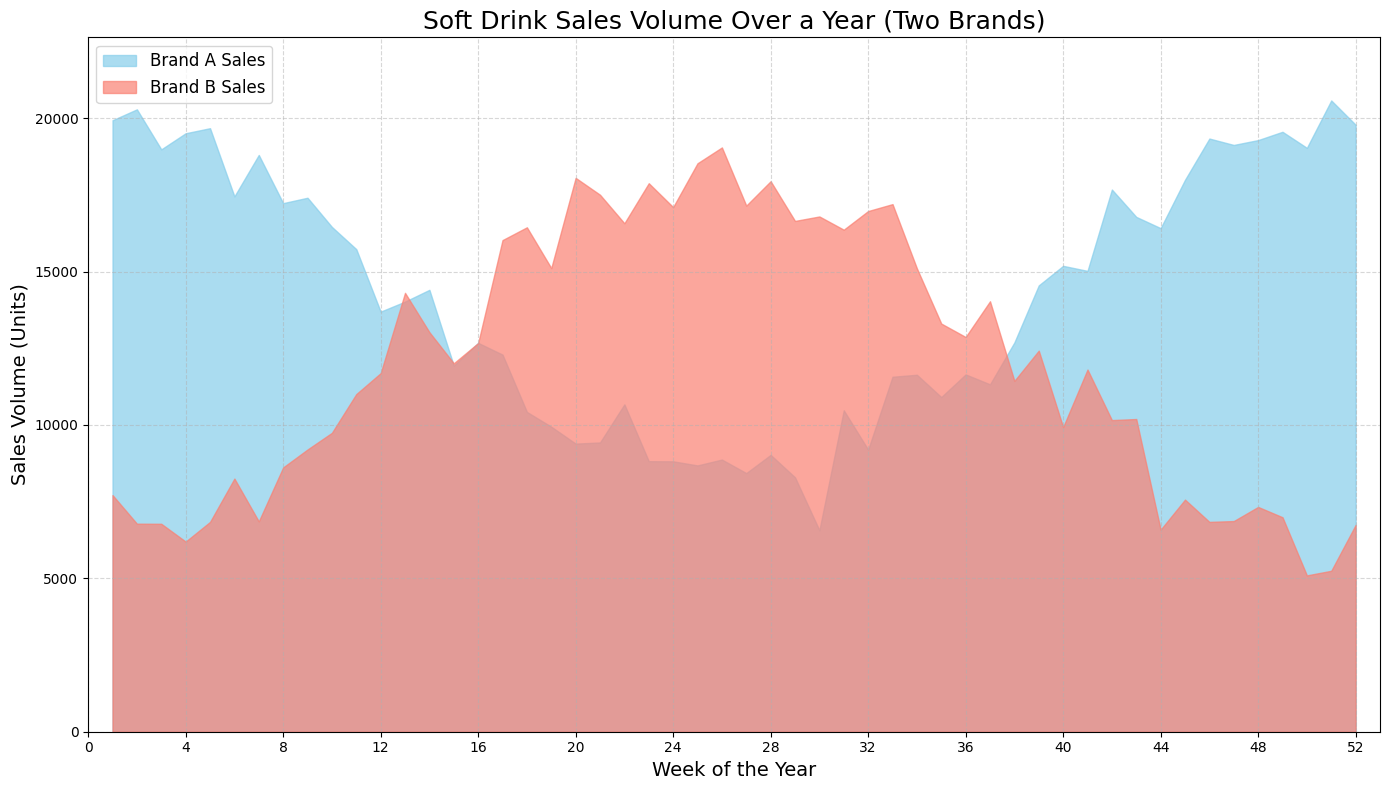

Generated Sales Data (first 5 rows):
   Week  Brand A Sales  Brand B Sales
0     1   19935.193982    7714.218609
1     2   20291.023861    6782.614274
2     3   18985.342607    6779.049530
3     4   19510.802712    6198.790123
4     5   19675.707411    6839.661108

Generated Sales Data (last 5 rows):
    Week  Brand A Sales  Brand B Sales
47    48   19287.954399    7328.670406
48    49   19558.236781    6992.174586
49    50   19035.038162    5096.469397
50    51   20580.046947    5246.946486
51    52   19788.356679    6742.159014


In [28]:
# Parameters for the sales data
num_weeks = 52 
weeks = np.arange(1, num_weeks + 1)

# Brand A: Increasing then Decreasing (Inverted U-shape)
center_peak_week_A = num_weeks / 2.0
max_sales_A = 20000 
min_sales_A = 8000  
amplitude_A = (max_sales_A - min_sales_A)

# Using a sinusoidal function for a smooth inverted U-shape
base_sales_A = (amplitude_A / 2) * (1 - np.cos(2 * np.pi * (weeks - center_peak_week_A) / num_weeks)) + min_sales_A

# Add random noise
noise_amplitude_A = 1000
noise_A = np.random.normal(loc=0, scale=noise_amplitude_A, size=num_weeks)
sales_A = base_sales_A + noise_A
sales_A[sales_A < 0] = 0 

# Brand B: Decreasing then Increasing (U-shape)
center_trough_week_B = num_weeks / 2.0 
min_sales_B = 6000 
max_sales_B = 18000 
amplitude_B = (max_sales_B - min_sales_B)

# Using a sinusoidal function for a smooth U-shape
base_sales_B = (amplitude_B / 2) * (np.cos(2 * np.pi * (weeks - center_trough_week_B) / num_weeks)) + min_sales_B + amplitude_B/2

# Add random noise
noise_amplitude_B = 900
noise_B = np.random.normal(loc=0, scale=noise_amplitude_B, size=num_weeks)
sales_B = base_sales_B + noise_B
sales_B[sales_B < 0] = 0 

# Create a Pandas DataFrame
df_combined_sales = pd.DataFrame({
    'Week': weeks,
    'Brand A Sales': sales_A,
    'Brand B Sales': sales_B
})

# Plot the data as an Area Plot
plt.figure(figsize=(14, 8))

# Plot Brand A sales (increasing then decreasing)
plt.fill_between(df_combined_sales['Week'], df_combined_sales['Brand A Sales'], color='skyblue', alpha=0.7, label='Brand A Sales')
# Plot Brand B sales (decreasing then increasing)
plt.fill_between(df_combined_sales['Week'], df_combined_sales['Brand B Sales'], color='salmon', alpha=0.7, label='Brand B Sales')

# Add titles and labels for clarity
plt.title('Soft Drink Sales Volume Over a Year (Two Brands)', fontsize=18)
plt.xlabel('Week of the Year', fontsize=14)
plt.ylabel('Sales Volume (Units)', fontsize=14)
plt.xticks(np.arange(0, num_weeks + 1, 4)) # Show ticks every 4 weeks
plt.xlim(0, num_weeks + 1)
plt.ylim(0, max(df_combined_sales['Brand A Sales'].max(), df_combined_sales['Brand B Sales'].max()) * 1.1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout() 
plt.show()

# Display a sample of the generated data
print("Generated Sales Data (first 5 rows):")
print(df_combined_sales.head())
print("\nGenerated Sales Data (last 5 rows):")
print(df_combined_sales.tail())


# 4. Storytelling With Data plot



Reproduce any graph of your choice in p. 71-85 of the Storytelling With Data book as best you can.  (The first half of chapter three).

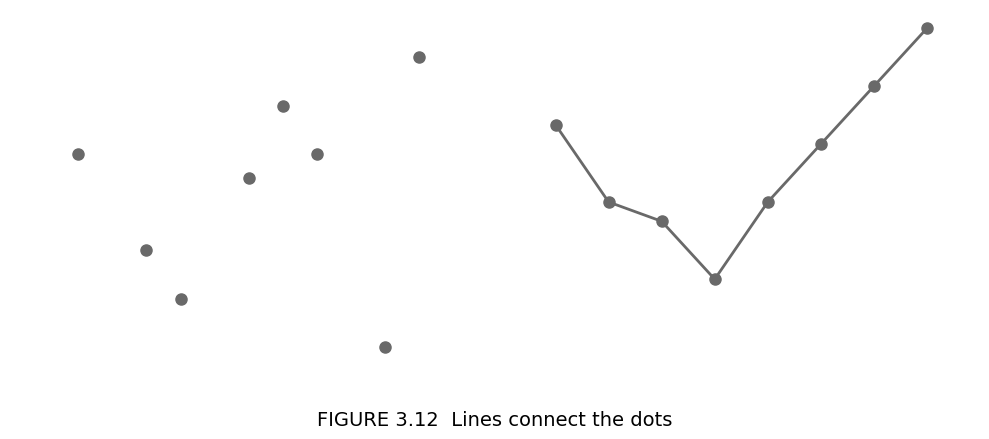

In [31]:
# Data for both plots
# Create some sample data that vaguely resembles the patterns in the figure.
x_scatter = np.array([1, 2, 2.5, 3.5, 4, 4.5, 5.5, 6])
y_scatter = np.array([5, 3, 2, 4.5, 6, 5, 1, 7]) # This gives a general spread similar to the left plot

# For the line plot, the x values should be ordered (e.g., time, sequence)
# and y values should show a trend (decrease, then increase).
x_line = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y_line = np.array([7, 5, 4.5, 3, 5, 6.5, 8, 9.5]) # This creates a U-like shape that then increases sharply

# Create the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # 1 row, 2 columns, adjust figsize as needed

# Left Subplot: Scatter Plot
ax1 = axes[0]
ax1.plot(x_scatter, y_scatter, 'o', color='dimgray', markersize=8) # 'o' for dots

# Remove chart junk for a cleaner look, typical of Storytelling with Data
ax1.set_xticks([]) 
ax1.set_yticks([]) 
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

# Set limits to approximate the visual spread, without showing actual numbers
ax1.set_xlim(0, 7)
ax1.set_ylim(0, 8)


# Right Subplot: Line Plot
ax2 = axes[1]
ax2.plot(x_line, y_line, marker='o', linestyle='-', color='dimgray', markersize=8, linewidth=2) # 'o' for dots, '-' for line

# Remove chart junk for a cleaner look
ax2.set_xticks([]) # Remove x-axis ticks
ax2.set_yticks([]) # Remove y-axis ticks
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Set limits to approximate the visual spread
ax2.set_xlim(0, 9)
ax2.set_ylim(0, 10)


# Add a single common title for the figure
# plt.suptitle() creates a title for the entire figure
plt.suptitle('FIGURE 3.12  Lines connect the dots', fontsize=14, y=0.1) # Position title below plots

plt.tight_layout(rect=[0, 0.1, 1, 1]) # Adjust layout to make space for suptitle
plt.show()